# 1. Setup and Get Data

## 1.1 Install Dependencies and Setup

In [1]:
%pip install labelme

In [2]:
%pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\jo_bi\AppData\Local\Temp\pip-install-p_t_fxcl\tensorflow-gpu_2ffd0873d23445e4a7651a4764e5acbd\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

In [1]:
import os
import time
import uuid
import cv2

## 1.1 Verify and Create Folders

Validate the `data` and `aug_data` folder and structure

- data
    - images
    - labels
    - test
        - images
        - labels
    - train
        - images
        - labels
    - val
        - images
        - labels
- aug_data
    - test
        - images
        - labels
    - train
        - images
        - labels
    - val
        - images
        - labels

### Criar com Set - Deprecated

In [1]:
# This funciton must be called under the check_folder_structure function or after validations
# def create_folders(path=None, childrens=['images', 'labels']):
#     # already know that the folder dont exists
#     if path is not None:
#         os.makedirs(path)
#         print(f'A pasta {path} foi criada.')

#         for children in childrens:
#             children_path = path + '/' + children 
#             create_folders(children_path, [])
#     else:
#         print('O nome da pasta não foi definida.')

In [2]:
# def check_folder_structure(path=None, childrens=['images', 'labels']):
#     if path is None:
#         print('O nome da pasta não foi definido.')
#         pass
     
#     if os.path.exists(path):
#         print(f'O diretório {path} já existe.')

#         for children in childrens:
#             children_path = path + '/' + children 
#             check_folder_structure(children_path, [])

#     else:
#         print(f'O diretório {path} não existe.')
#         create_folders(path, childrens)

In [3]:
# check_folder_structure('./data', ['test', 'train', 'val'])

### Criar com Dicionário

In [86]:
def validate(path):
    if os.path.exists(path):
        #print(f'O diretório {path} já existe.')
        return True
    else:
        #print(f'O diretório {path} não existe.')
        return False

In [58]:
def create(path=None):
    if path is not None:
        os.makedirs(path)
        print(f'A pasta {path} foi criada.')
    else:
        print('O nome da pasta não foi definido.')

In [87]:
def init_folder_structure(source='.', structure={}):
    # varrer o dicionário
    for folder in structure:
        path = f'{source}/{folder}'
        # validar se existe a pasta
        exists = validate(path)
        if not exists:
            create(path)
        
        childrens =  structure[folder]

        if childrens:
            init_folder_structure(source=path, structure=childrens)
        

In [84]:
structure = {
                'data': {
                        'images': {}, 
                        'labels': {},
                        'train': {'images': {}, 'labels': {}},
                        'test': {'images': {}, 'labels': {}},
                        'val': {'images': {}, 'labels': {}}
                    },
                'aug_data': {
                    'train': {'images': {}, 'labels': {}},
                    'test': {'images': {}, 'labels': {}},
                    'val': {'images': {}, 'labels': {}}
                }
            }

In [85]:
init_folder_structure(structure=structure)

O diretório ./data já existe.
O diretório ./data/images já existe.
O diretório ./data/labels já existe.
O diretório ./data/train não existe.
A pasta ./data/train foi criada.
O diretório ./data/train/images não existe.
A pasta ./data/train/images foi criada.
O diretório ./data/train/labels não existe.
A pasta ./data/train/labels foi criada.
O diretório ./data/test já existe.
O diretório ./data/test/images já existe.
O diretório ./data/test/labels não existe.
A pasta ./data/test/labels foi criada.
O diretório ./data/val não existe.
A pasta ./data/val foi criada.
O diretório ./data/val/images não existe.
A pasta ./data/val/images foi criada.
O diretório ./data/val/labels não existe.
A pasta ./data/val/labels foi criada.
O diretório ./aug_data não existe.
A pasta ./aug_data foi criada.
O diretório ./aug_data/train não existe.
A pasta ./aug_data/train foi criada.
O diretório ./aug_data/train/images não existe.
A pasta ./aug_data/train/images foi criada.
O diretório ./aug_data/train/labels n

## 1.2 Acquire Images

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
!labelme

# 2. Review Dataset and Build Image Loading Function

## 2.1 Import TF and Deps

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

## 2.2 Limit GPU Memory Growth

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2.3 Load Image into TF Data Pipeline

In [6]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [7]:
images.as_numpy_iterator().next()

b'data\\images\\83cdc218-a3de-11ee-8916-bcf4d4e6c02d.jpg'

In [8]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[149, 163, 164],
        [149, 163, 164],
        [149, 163, 164],
        ...,
        [164, 175, 171],
        [164, 174, 173],
        [163, 173, 172]],

       [[148, 162, 163],
        [148, 162, 163],
        [149, 163, 164],
        ...,
        [165, 176, 172],
        [165, 175, 174],
        [165, 175, 174]],

       [[148, 162, 163],
        [148, 162, 163],
        [149, 163, 164],
        ...,
        [165, 176, 172],
        [165, 175, 174],
        [166, 176, 175]],

       ...,

       [[139, 149, 150],
        [139, 149, 150],
        [139, 149, 148],
        ...,
        [129, 114,  93],
        [129, 114,  95],
        [127, 114,  95]],

       [[139, 149, 150],
        [139, 149, 150],
        [139, 149, 148],
        ...,
        [128, 113,  90],
        [129, 114,  93],
        [129, 114,  93]],

       [[137, 147, 148],
        [138, 148, 149],
        [139, 149, 148],
        ...,
        [128, 112,  89],
        [129, 114,  93],
        [129, 114,  93]]

In [11]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

## 2.4 View Raw Images with Matplotlib

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
plot_images = image_generator.next()

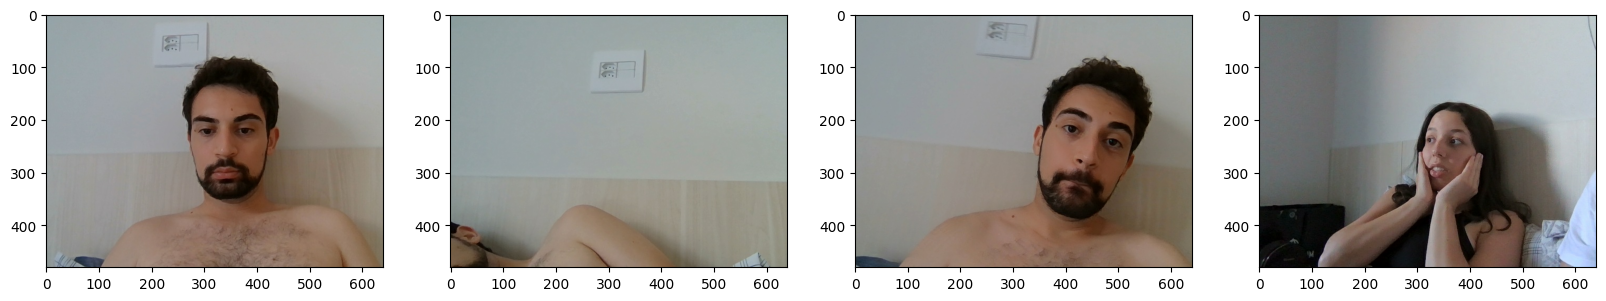

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

## 3.1 Automatic Split Data

In [147]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [145]:
import math
import shutil
from tqdm import tqdm

In [114]:
class DataSplited:
    def __init__(self, quantity=None, data=[]) -> None:
        self.quantity = quantity
        self.data = data

In [132]:
# Lisst all images files
images_data = os.listdir(IMAGES_PATH)

In [133]:
images_data = np.asarray(images_data)

In [134]:

quantity = images_data.shape[0]
print("Quantidade de amostras:", quantity)
    

Quantidade de amostras: 182


In [123]:
def number_of_samples(total, train, test):
    train_count =  math.floor((total * train)/100)
    test_count =  math.floor((total * test)/100)

    return train_count, test_count

In [124]:
def get_samples(dataset, dataset_count, quantity, start):
    if not dataset_count:
        dataset_count = np.asarray(dataset).shape[0]

    final = start + quantity

    if final > dataset_count:
        final = dataset_count

    return dataset[start:final]

In [125]:
def split_dataset(dataset, train=70, test=20, shuffle=False):
    dataset_count = dataset.shape[0]

    qtd_train, qtd_test = number_of_samples(dataset_count, train, test)

    if not shuffle:
        train_samples = get_samples(dataset=dataset,
                                    dataset_count=dataset_count,
                                    quantity=qtd_train,
                                    start=0)
        test_samples = get_samples(dataset=dataset,
                                    dataset_count=dataset_count,
                                    quantity=qtd_test,
                                    start=qtd_train)
    
    train_data = DataSplited(quantity=qtd_train, data=train_samples)
    test_data = DataSplited(quantity=qtd_test, data=test_samples)

    return train_data, test_data

In [141]:
train, test = split_dataset(dataset=images_data,
                             train=80,
                             test=20)

In [142]:
# Get val from train
dataset_to_val = train.data
train, val = split_dataset(dataset=dataset_to_val,
                           train=80,
                           test=20)

### 3.1.2 Move Images

In [135]:
# IMAGES_PATH
TRAIN_PATH = os.path.join('data','train', 'images')
TEST_PATH = os.path.join('data','test', 'images')
VAL_PATH = os.path.join('data','val', 'images')

In [154]:
def copy_images(dataset, origin, destination):
    for image in tqdm(dataset, desc='Progress'):
        origin_file = os.path.join(origin, image)
        destination_file = os.path.join(destination, image)
        shutil.copy(origin_file, destination_file)

In [155]:
copy_images(train.data, IMAGES_PATH, TRAIN_PATH)
copy_images(test.data, IMAGES_PATH, TEST_PATH)
copy_images(val.data, IMAGES_PATH, VAL_PATH)

Progress:   0%|          | 0/36 [00:00<?, ?it/s]

Progress: 100%|██████████| 29/29 [00:00<00:00, 577.50it/s]


## 3.2 Move the Matching Labels

In [156]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

# 4. Apply Image Augmentation on Images and Labels using Albumentations

## 4.1 Setup Albumentations Transform Pipeline

In [157]:
import albumentations as alb

In [158]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

## 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [159]:
img = cv2.imread(os.path.join('data','train', 'images','88c93ffe-a3de-11ee-ab9e-bcf4d4e6c02d.jpg'))

In [160]:
with open(os.path.join('data', 'train', 'labels', '88c93ffe-a3de-11ee-ab9e-bcf4d4e6c02d.json'), 'r') as f:
    label = json.load(f)

In [161]:
label['shapes'][0]['points']

[[308.8268156424581, 99.21787709497208], [484.2458100558659, 363.463687150838]]

## 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [162]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [30]:
coords

[296.3888888888889, 90.92592592592598, 492.68518518518516, 381.66666666666674]

In [163]:
coords = list(np.divide(coords, [640,480,640,480]))

In [164]:
coords

[0.48254189944134074,
 0.20670391061452517,
 0.7566340782122905,
 0.7572160148975792]

## 4.4 Apply Augmentations and View Results

In [165]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [166]:
augmented['bboxes'][0][2:]

(0.4048292985723153, 0.7476970825574177)

In [167]:
augmented['bboxes']

[(0.015009310986964675,
  0.16048417132216017,
  0.4048292985723153,
  0.7476970825574177)]

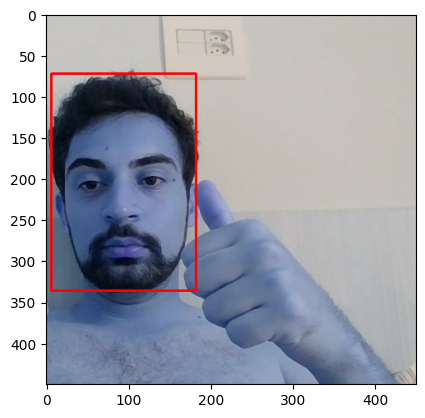

In [168]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

## 5.1 Run Augmentation Pipeline

In [169]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

## 5.2 Load Augmented Images to Tensorflow Dataset

In [170]:
def load_augmented(type, shuffle=False, size=(0, 0)):
    images = tf.data.Dataset.list_files('aug_data\\' + type + '\\images\\*.jpg', shuffle=False)
    images = images.map(load_image)
    images = images.map(lambda x: tf.image.resize(x, size))
    images = images.map(lambda x: x/255)

In [171]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [172]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [173]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [174]:
train_images.as_numpy_iterator().next()

array([[[0.7731005 , 0.78878677, 0.78976715],
        [0.7682598 , 0.7923407 , 0.78860295],
        [0.7607843 , 0.79607844, 0.78431374],
        ...,
        [0.71666664, 0.7480392 , 0.75980395],
        [0.7159926 , 0.7473652 , 0.7591299 ],
        [0.7165441 , 0.7445466 , 0.76642156]],

       [[0.76715684, 0.7862132 , 0.7846201 ],
        [0.7676471 , 0.79264706, 0.7852941 ],
        [0.7647059 , 0.8       , 0.7892157 ],
        ...,
        [0.7280024 , 0.759375  , 0.7672181 ],
        [0.72199756, 0.7533701 , 0.7651348 ],
        [0.714951  , 0.7438725 , 0.7629902 ]],

       [[0.77205884, 0.7916667 , 0.80735296],
        [0.76121324, 0.7925858 , 0.8034314 ],
        [0.76715684, 0.7985294 , 0.8063725 ],
        ...,
        [0.7289216 , 0.76029414, 0.77205884],
        [0.72248775, 0.7538603 , 0.765625  ],
        [0.7235294 , 0.752451  , 0.77156866]],

       ...,

       [[0.64276963, 0.49816176, 0.39718136],
        [0.63915443, 0.48376226, 0.38523284],
        [0.6476103 , 0

# 6. Prepare Labels

## 6.1 Build Label Loading Function

In [175]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## 6.2 Load Labels to Tensorflow Dataset

In [176]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [177]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [178]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [179]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.286 , 0.3665, 0.9004], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Check Partition Lengths

In [180]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(6960, 6960, 2160, 2160, 1740, 1740)

## 7.2 Create Final Datasets (Images/Labels)

In [181]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [182]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [183]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [184]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.3306  , 0.1533  , 0.7524  ],
        [0.002869, 0.1771  , 0.296   , 0.5903  ],
        [0.5522  , 0.22    , 1.      , 0.7935  ],
        [0.      , 0.2764  , 0.1615  , 0.6836  ],
        [0.      , 0.2396  , 0.0762  , 0.647   ],
        [0.304   , 0.2456  , 0.694   , 0.833   ],
        [0.      , 0.2124  , 0.08936 , 0.57    ]], dtype=float16))

## 7.3 View Images and Annotations

In [185]:
data_samples = train.as_numpy_iterator()

In [186]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


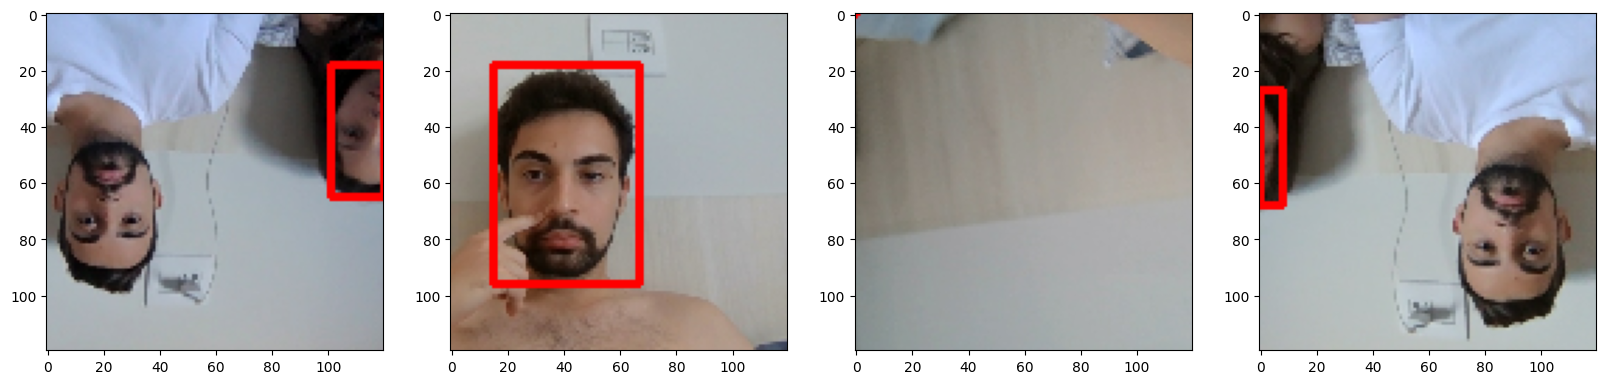

In [187]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # convert the image to cv::UMat
    sample_image_umat = cv2.UMat(sample_image)

    start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))

    cv2.rectangle(sample_image_umat, start_point, end_point, (255, 0, 0), 2)

    
    # cv2.rectangle(sample_image, 
    #               tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
    #               tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
    #                     (255,0,0), 2)

    sample_image_result = np.array(sample_image_umat.get())
    
    ax[idx].imshow(sample_image_result)

# 8. Build Deep Learning using the Functional API

## 8.1 Import Layers and Base Network

In [188]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download VGG16

In [189]:
vgg = VGG16(include_top=False)

In [190]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [191]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

## 8.4 Test out Neural Network

In [192]:
facetracker = build_model()

In [193]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [194]:
X, y = train.as_numpy_iterator().next()

In [195]:
X.shape

(8, 120, 120, 3)

In [196]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 5s 5s/step


In [197]:
classes, coords

(array([[0.5081693 ],
        [0.50320894],
        [0.4730668 ],
        [0.40390542],
        [0.38863325],
        [0.44386625],
        [0.4775312 ],
        [0.3704849 ]], dtype=float32),
 array([[0.51827735, 0.618517  , 0.63295746, 0.48421228],
        [0.55064213, 0.6407948 , 0.6592836 , 0.50127506],
        [0.5254759 , 0.64152837, 0.74178046, 0.49025786],
        [0.5978638 , 0.683953  , 0.67755854, 0.51977825],
        [0.5267805 , 0.686112  , 0.64053947, 0.42840084],
        [0.5777793 , 0.7344798 , 0.7050552 , 0.48941213],
        [0.501988  , 0.64794207, 0.66264355, 0.36320686],
        [0.48318034, 0.6961887 , 0.63047963, 0.5833248 ]], dtype=float32))

# 9. Define Losses and Optimizers

## 9.1 Define Optimizer and LR

In [198]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [199]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

## 9.2 Create Localization Loss and Classification Loss

In [200]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size


In [201]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test out Loss Metrics

In [202]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.3552823>

In [203]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8192147>

In [204]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.3552823>

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [205]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [206]:
model = FaceTracker(facetracker)

In [207]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [208]:
logdir='logs'

In [209]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [210]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


870/870 [==============================] - 125s 129ms/step - total_loss: 0.3914 - class_loss: 0.1083 - regress_loss: 0.3373 - val_total_loss: 0.0786 - val_class_loss: 0.0491 - val_regress_loss: 0.0540
Epoch 2/10
870/870 [==============================] - 102s 110ms/step - total_loss: 0.2022 - class_loss: 0.0608 - regress_loss: 0.1718 - val_total_loss: 0.0719 - val_class_loss: 0.0641 - val_regress_loss: 0.0399
Epoch 3/10
870/870 [==============================] - 109s 118ms/step - total_loss: 0.1480 - class_loss: 0.0402 - regress_loss: 0.1279 - val_total_loss: 0.0128 - val_class_loss: 0.0061 - val_regress_loss: 0.0097
Epoch 4/10
870/870 [==============================] - 127s 113ms/step - total_loss: 0.1259 - class_loss: 0.0334 - regress_loss: 0.1092 - val_total_loss: 0.0334 - val_class_loss: 0.0327 - val_regress_loss: 0.0171
Epoch 5/10
870/870 [==============================] - 101s 110ms/step - total_loss: 0.1100 - class_loss: 0.0301 - regress_loss: 0.0950 - val_total_loss: 0.0345 - v

## 10.3 Plot Performance

In [211]:
hist.history

{'total_loss': [0.5449309349060059,
  0.04380987584590912,
  0.006823568604886532,
  0.3856210708618164,
  0.04737238585948944,
  0.004834955558180809,
  0.008897794410586357,
  0.019172832369804382,
  0.008604204282164574,
  0.0076368423178792],
 'class_loss': [0.0018170102266594768,
  0.002931416966021061,
  0.00151238520629704,
  0.0010401218896731734,
  0.024418741464614868,
  0.0003205712710041553,
  0.0004591123724821955,
  0.006771620828658342,
  0.0002188338403357193,
  0.00023226586927194148],
 'regress_loss': [0.5440224409103394,
  0.042344167828559875,
  0.006067376118153334,
  0.3851010203361511,
  0.03516301512718201,
  0.004674669820815325,
  0.008668238297104836,
  0.015787022188305855,
  0.0084947869181633,
  0.007520709186792374],
 'val_total_loss': [0.07858079671859741,
  0.07194992899894714,
  0.012799790129065514,
  0.03341913968324661,
  0.034517206251621246,
  0.02944634109735489,
  0.042276639491319656,
  0.03383760154247284,
  0.00674676988273859,
  0.3094988465

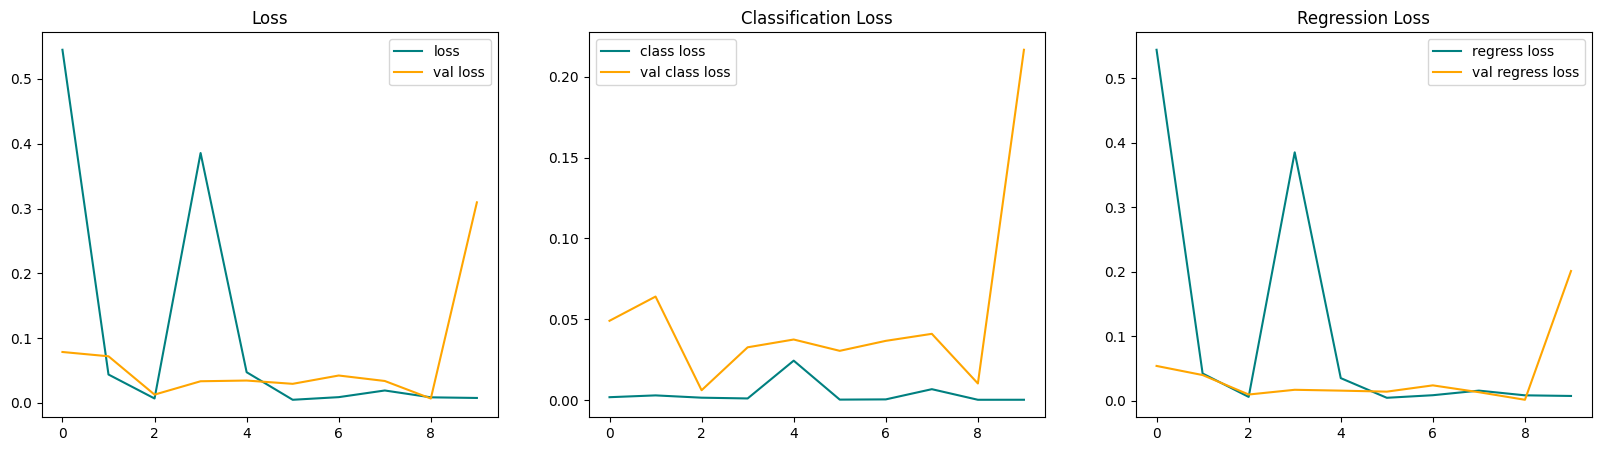

In [212]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [213]:
test_data = test.as_numpy_iterator()

In [214]:
test_sample = test_data.next()

In [215]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 337ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


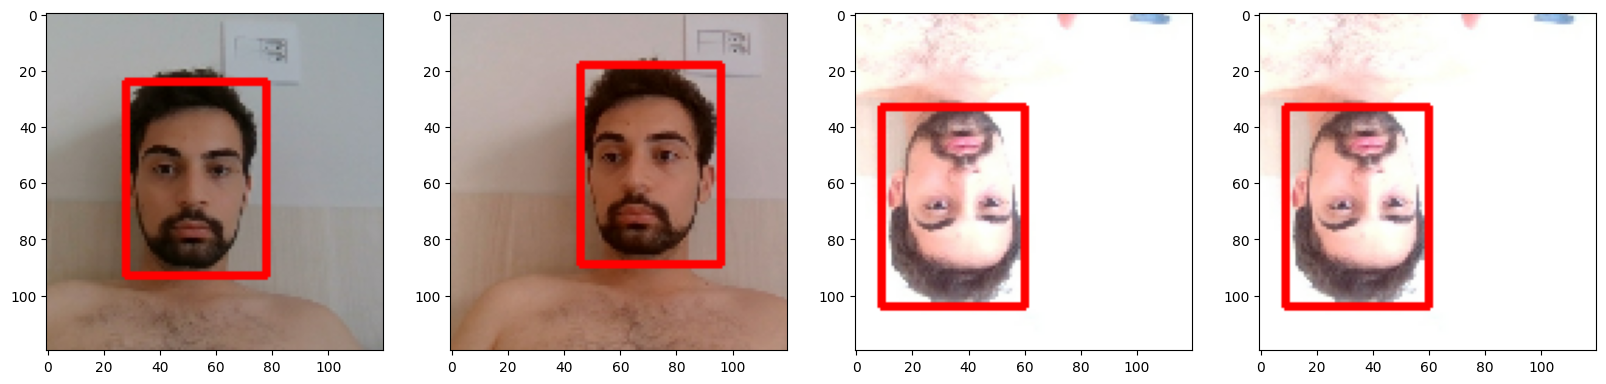

In [216]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        # cv2.rectangle(sample_image, 
        #               tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
        #               tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
        #                     (255,0,0), 2)
        # convert the image to cv::UMat
        sample_image_umat = cv2.UMat(sample_image)

        start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
        end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))

        cv2.rectangle(sample_image_umat, start_point, end_point, (255, 0, 0), 2)

        
        # cv2.rectangle(sample_image, 
        #               tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
        #               tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
        #                     (255,0,0), 2)

        sample_image_result = np.array(sample_image_umat.get())
    
    ax[idx].imshow(sample_image_result)
    
    #ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [217]:
from tensorflow.keras.models import load_model

In [218]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

## 11.3 Real Time Detection

In [219]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step


In [125]:
cap.release()
cv2.destroyAllWindows()